<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# feel free to import other libraries! 

In [2]:
df = pd.read_csv('c:/Users/ander/Documents/mdst_tutorials/data/states_edu.csv')

Chosen test: Math_8

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [3]:
#rename columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#dropna for the set I really care about
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
#fillna on this column because I need it for a variable later
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [4]:
#exp per student is a good idea
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
#percent enrollment in 8th grade
df['ENROLL_8_PERCENT_PRIMARY'] = df['ENROLL_8']/df['ENROLL_PRIMARY']

Final feature list: Year, expenditure per student, 8th grade enrollment as a percent of primary enrollment

Feature selection justification: Year to see if scores are changing over time, expenditure per student to see how influential funding is, 8 enrollment as a percent of primary to see if the proportion of kids in 8th grade has an impact

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

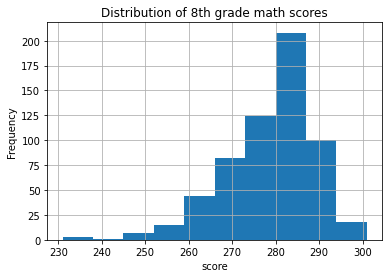

In [5]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores')

This shows the distribution of average 8th grade math scores to give an overall impression of the data that we want to focus on.

Visualization 2

Text(0, 0.5, '8th grade math score')

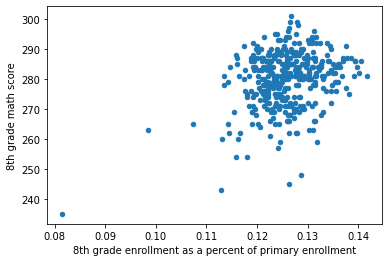

In [6]:
df.plot.scatter(x='ENROLL_8_PERCENT_PRIMARY',y='AVG_MATH_8_SCORE')
plt.xlabel('8th grade enrollment as a percent of primary enrollment')
plt.ylabel('8th grade math score')

This is a scatterplot comparing math scores to 8th grade enrollment as a percent of primary enrollment to see if it appears there could be a correlation between these two. It appears that there may be a positive correlation between these two variables.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['ENROLL_8_PERCENT_PRIMARY','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Regression

In [11]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [12]:
# create your model here
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

0.35107417994238843
-0.666324845365682
5.694906802319759
7.0330110213595525


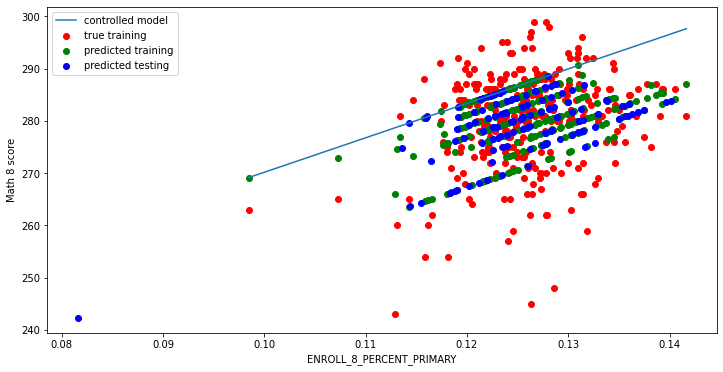

In [19]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.
col_name = 'ENROLL_8_PERCENT_PRIMARY'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

#Now look at error values
#score
print(model.score(X_test, y_test))
#mean error
print(np.mean(model.predict(X_test)-y_test))
#absolute error
print(np.mean(np.abs(model.predict(X_test)-y_test)))
#root mean squared error
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

<h2> Summary </h2>

I tried to predict 8th grade math scores using these three variables: year to see if scores are changing over time, expenditure per student to see how influential funding is, 8 enrollment as a percent of primary to see if the proportion of kids in 8th grade has an impact. The model had a score of .35, which is not very good, although higher than the tutorial. Notable among the error values is a higher mean squared error (7.03), which indicates more large errors in the model. Based on the model that I've created, I don't think that student scores on the Math 8 test can be accurately predicted, at least with the variables I used. A score of .35 is not sufficient to use as a true model to accurately predict data